In [75]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [79]:
#import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score

In [80]:
#load the data
df = pd.read_csv(r'E:\becode_projects\second_df.csv')

del df['Unnamed: 0']
df = df.dropna(subset=['bathroom_count'])
df = df.dropna(subset=['bedroom_count'])
df = df.dropna(subset=['construction_year'])
df = df.dropna(subset=['district'])
del df['flooding_zone']
del df['subtype_of_property']
del df['room_count']
del df['locality']
del df['type_of_sale']
del df['construction_year']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104396 entries, 0 to 104395
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   bathroom_count        104396 non-null  int64  
 1   bedroom_count         104396 non-null  int64  
 2   district              104396 non-null  object 
 3   garden                20364 non-null   float64
 4   garden_area           20364 non-null   float64
 5   kitchen               57594 non-null   object 
 6   living_area           104396 non-null  float64
 7   number_of_facades     67698 non-null   float64
 8   price                 104396 non-null  int64  
 9   surface_of_plot       104396 non-null  float64
 10  swimming_pool         104396 non-null  float64
 11  terrace               104396 non-null  float64
 12  type_of_property      104396 non-null  int64  
 13  PEB_grade             104396 non-null  int64  
 14  Building_state_grade  104396 non-null  int64  
 15  

Split into houses and appartments

In [81]:
houses = df[df['type_of_property'] == 1]
appartments = df[df['type_of_property'] == 2]
houses.to_csv('df_house.csv')
appartments.to_csv('df_appartments.csv')

In [82]:
df_house =pd.read_csv(r'E:\2024_Python\becode_projects\MachineLearning_Immo\df_houses.csv')
df_house.head()
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54802 entries, 0 to 54801
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            54802 non-null  int64  
 1   bathroom_count        54802 non-null  int64  
 2   bedroom_count         54802 non-null  int64  
 3   garden                16290 non-null  float64
 4   garden_area           16290 non-null  float64
 5   kitchen               29694 non-null  object 
 6   living_area           54802 non-null  float64
 7   number_of_facades     43766 non-null  float64
 8   price                 54802 non-null  int64  
 9   surface_of_plot       54802 non-null  float64
 10  swimming_pool         54802 non-null  float64
 11  terrace               54802 non-null  float64
 12  type_of_property      54802 non-null  int64  
 13  PEB_grade             54802 non-null  int64  
 14  Building_state_grade  54802 non-null  int64  
 15  pricesqm           

In [83]:

del df_house['garden']
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54802 entries, 0 to 54801
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            54802 non-null  int64  
 1   bathroom_count        54802 non-null  int64  
 2   bedroom_count         54802 non-null  int64  
 3   garden_area           16290 non-null  float64
 4   kitchen               29694 non-null  object 
 5   living_area           54802 non-null  float64
 6   number_of_facades     43766 non-null  float64
 7   price                 54802 non-null  int64  
 8   surface_of_plot       54802 non-null  float64
 9   swimming_pool         54802 non-null  float64
 10  terrace               54802 non-null  float64
 11  type_of_property      54802 non-null  int64  
 12  PEB_grade             54802 non-null  int64  
 13  Building_state_grade  54802 non-null  int64  
 14  pricesqm              54802 non-null  float64
dtypes: float64(7), int6

In [84]:
#imputer = KNNImputer(n_neighbors=5)
#df_houses[['garden_area']] = imputer.fit_transform(df_houses[['garden_area']])

#df_houses['garden_area'] = df_houses['garden_area'].round().astype(int)

In [85]:
df_house.unique('kitchen')

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
kitchen_grade = {'USA_HYPER_EQUIPPED': 8,
 'USA_SEMI_EQUIPPED': 7,
 'USA_INSTALLED': 6,
 'HYPER_EQUIPPED': 5,
 'SEMI_EQUIPPED': 4,
 'INSTALLED': 3,
 'USA_UNINSTALLED': 2,
 'NOT_INSTALLED': 1}
df_house['kitchen_grade'] = df_house['kitchen'].map(kitchen_grade)
#df_house.to_csv("houses_k.csv", index = True)
df_house["kitchen_grade"].fillna(0, inplace = True)




KeyError: 'kitchen'

In [ ]:
del df_house['kitchen']

In [ ]:
df_house.dropna(subset=['number_of_facades'], inplace=True)
del df_house['Unnamed: 0']
del df_house['type_of_property']
del df_house['surface_of_plot']
del df_house['garden_area']
del df_house['terrace']
del df_house['garden']



In [ ]:
df_house.to_csv('df_houses_C.csv')

In [ ]:
df = pd.read_csv('df_houses_C.csv')

In [ ]:
df.isnull().sum()


Unnamed: 0              0
bathroom_count          0
bedroom_count           0
living_area             0
number_of_facades       0
price                   0
swimming_pool           0
PEB_grade               0
Building_state_grade    0
pricesqm                0
kitchen_grade           0
dtype: int64

In [ ]:
df.dtypes
df.isnull().sum()
kitchen = df["bathroom_count"].unique()
print(kitchen)



[ 6  2  1  0  3  4  5  9 11  8  7 10 12 15 13 14 18 17 16 19 20]


In [ ]:
df = df[df['bedroom_count'] <= 20]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43741 entries, 0 to 43765
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            43741 non-null  int64  
 1   bathroom_count        43741 non-null  int64  
 2   bedroom_count         43741 non-null  int64  
 3   living_area           43741 non-null  float64
 4   number_of_facades     43741 non-null  float64
 5   price                 43741 non-null  int64  
 6   swimming_pool         43741 non-null  float64
 7   PEB_grade             43741 non-null  int64  
 8   Building_state_grade  43741 non-null  int64  
 9   pricesqm              43741 non-null  float64
 10  kitchen_grade         43741 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 4.0 MB


In [ ]:
df.head()

,Unnamed: 0,bathroom_count,bedroom_count,living_area,number_of_facades,price,swimming_pool,PEB_grade,Building_state_grade,pricesqm,kitchen_grade
0,0,6,13,391.0,3.0,765000,0.0,4,4,1799.0,0.0
1,1,2,4,111.0,2.0,399000,0.0,6,4,3670.0,3.0
2,2,1,4,172.0,2.0,230000,0.0,2,3,3349.0,0.0
3,3,0,2,172.0,3.0,235000,0.0,2,4,2620.0,0.0
4,4,3,5,515.0,4.0,1198000,0.0,3,4,2614.0,3.0


In [ ]:
del df['Unnamed: 0']

In [ ]:
df_house.to_csv('df_houses_D.csv')
df.describe()



,bathroom_count,bedroom_count,living_area,number_of_facades,price,swimming_pool,PEB_grade,Building_state_grade,pricesqm,kitchen_grade
count,43741.000000,43741.000000,43741.000000,43741.000000,4.374100e+04,43741.000000,43741.000000,43741.000000,43741.000000,43741.000000
mean,1.374180,3.496033,207.709723,3.003292,4.753973e+05,0.034521,4.253378,3.849912,2341.504561,2.068105
std,1.024514,1.504380,112.963585,0.839327,5.117063e+05,0.182566,1.771122,1.359161,527.438910,2.010456
min,0.000000,0.000000,13.000000,1.000000,4.000000e+04,0.000000,1.000000,1.000000,1507.000000,0.000000
25%,1.000000,3.000000,148.000000,2.000000,2.590000e+05,0.000000,3.000000,4.000000,1969.000000,0.000000
50%,1.000000,3.000000,172.000000,3.000000,3.690000e+05,0.000000,5.000000,4.000000,2200.000000,3.000000
75%,2.000000,4.000000,229.000000,4.000000,5.090000e+05,0.000000,5.000000,4.000000,2716.000000,3.000000
max,20.000000,20.000000,1000.000000,4.000000,2.250000e+07,1.000000,9.000000,6.000000,3670.000000,8.000000


Linear regression

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (43741, 9)
y shape:  (43741,)


In [ ]:
df.corr()

,bathroom_count,bedroom_count,living_area,number_of_facades,price,swimming_pool,PEB_grade,Building_state_grade,pricesqm,kitchen_grade
bathroom_count,1.000000,0.537234,0.459138,0.036986,0.442073,0.178579,0.064245,0.099290,0.147189,0.130713
bedroom_count,0.537234,1.000000,0.492729,0.088714,0.326545,0.128691,0.051805,0.061502,0.102079,0.099132
living_area,0.459138,0.492729,1.000000,0.176961,0.521388,0.249415,0.086107,0.091561,0.146860,0.076806
number_of_facades,0.036986,0.088714,0.176961,1.000000,0.202640,0.181432,0.012511,0.055325,-0.015126,0.001994
price,0.442073,0.326545,0.521388,0.202640,1.000000,0.281142,0.168322,0.186540,0.364482,0.122004
swimming_pool,0.178579,0.128691,0.249415,0.181432,0.281142,1.000000,0.073067,0.116426,0.036987,0.104343
PEB_grade,0.064245,0.051805,0.086107,0.012511,0.168322,0.073067,1.000000,0.459713,0.068142,0.057434
Building_state_grade,0.099290,0.061502,0.091561,0.055325,0.186540,0.116426,0.459713,1.000000,0.044351,0.142503
pricesqm,0.147189,0.102079,0.146860,-0.015126,0.364482,0.036987,0.068142,0.044351,1.000000,0.045356
kitchen_grade,0.130713,0.099132,0.076806,0.001994,0.122004,0.104343,0.057434,0.142503,0.045356,1.000000


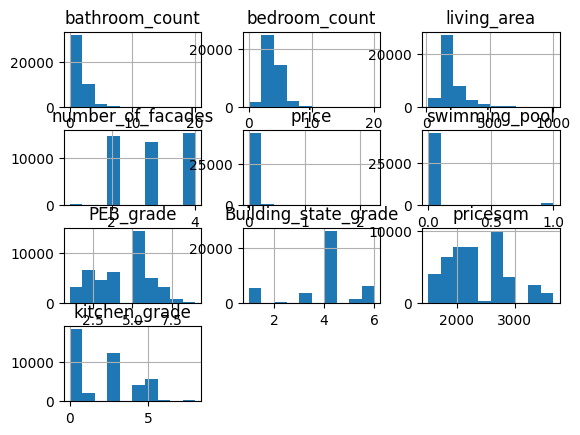

In [ ]:
df.hist()
plt.show()

In [ ]:

print(df.groupby('Building_state_grade').size())


Building_state_grade
1     5529
2      311
3     3735
4    26121
5     1711
6     6334
dtype: int64


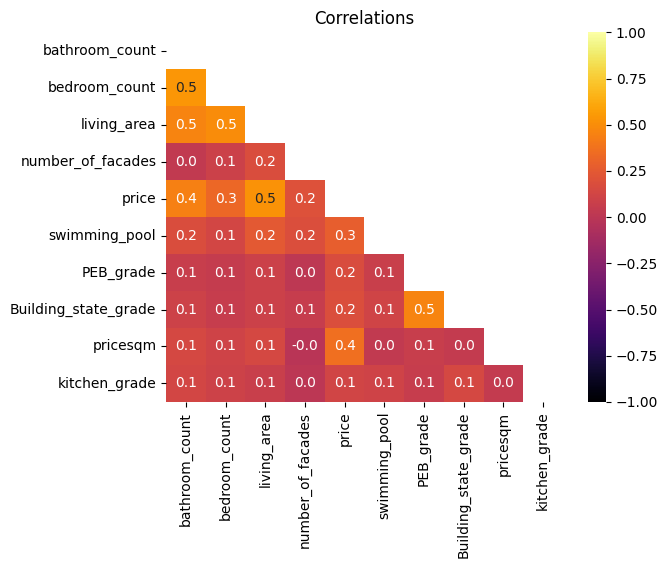

In [ ]:
corr_matrix = df.corr()
corr_matrix_np = corr_matrix.values
np.fill_diagonal(corr_matrix_np, 1)
corr_matrix = pd.DataFrame(corr_matrix_np, index=corr_matrix.index, columns=corr_matrix.columns)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="inferno", vmax=1, vmin=-1, fmt='.1f')
plt.title("Correlations")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (34992, 9)
Shape of X_test:  (8749, 9)
Shape of y_train:  (34992,)
Shape of y_test:  (8749,)


# KNeighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

RegModel = KNeighborsRegressor(n_neighbors=1)


print(RegModel)

# Fit the model on training data
KNN = RegModel.fit(X_train, y_train)
prediction = KNN.predict(X_test)

print('R2 Value:', r2_score(y_train, KNN.predict(X_train)))


accuracy = 100 - (np.mean(np.abs((y_test - prediction) / y_test)) * 100)
print('Accuracy:', accuracy)


TestingDataResults = pd.DataFrame(data=X_test, columns=X.columns)
TestingDataResults["Predicted"] = prediction
TestingDataResults["Actual"] = y_test.values


print(TestingDataResults.head())


# Guardar el modelo en un archivo pickle

import pickle
with open('knn_model.sav', 'wb') as file:
    pickle.dump(KNN, file)

KNeighborsRegressor(n_neighbors=1)
R2 Value: 0.9933690123221531
Accuracy: 66.60779132380497
       bathroom_count  bedroom_count  living_area  number_of_facades  \
5531                2              4        374.0                4.0   
8285                1              4        140.0                4.0   
30242               2              4        160.0                4.0   
42420               2              2        100.0                2.0   
34305               1              3        157.0                2.0   

       swimming_pool  PEB_grade  Building_state_grade  pricesqm  \
5531             0.0          6                     4    2716.0   
8285             0.0          5                     3    1507.0   
30242            0.0          6                     5    2716.0   
42420            0.0          3                     5    1812.0   
34305            0.0          2                     4    2151.0   

       kitchen_grade  Predicted  Actual  
5531             3.0   730000.

In [ ]:
pip install scikit-learn==1.5.1

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


#Check the number of neighbors that give best results

([<matplotlib.axis.XTick at 0x21d00813560>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

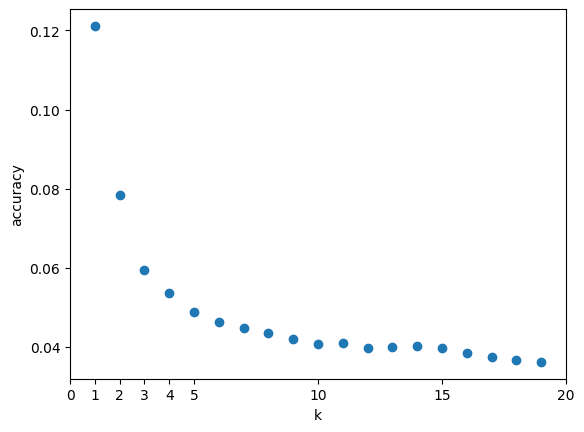

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,10,15,20])

In [ ]:
pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


# Random forest

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


MemoryError: could not allocate 1974468608 bytes

# Polynomial regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
# Step 4: Generating polynomial features 
Z = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=10)

# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

# Step 6: Validation
# Evaluating the trained model on training data
y_prediction = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating our trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))

MAE on train data=  145807.0235065016
MAE on test data =  142292.37482666946


# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = LinearRegression() # Instatiate LinearREgression object
regressor.fit(X_train, y_train) # fit the model

LinearRegression()

In [ ]:
regressor.coef_

array([-4.73984180e+05,  5.98837124e+04, -2.14431318e+03, -2.32022452e+05,
       -5.32369392e+05,  1.61275069e+04,  5.20807347e+03, -7.65893582e+02,
       -4.80951769e+04,  1.62089860e+03, -4.31474233e+03,  3.23260509e+01,
        4.23439119e+04,  1.16263152e+05,  1.38363419e+04,  1.01201216e+04,
        1.38994088e+02,  1.20117336e+03,  3.71710380e+03, -8.60607444e+01,
        3.90255430e+02,  3.81196503e+03, -1.97565920e+02, -8.22718836e+03,
       -1.10992659e+01,  2.07785295e+03,  5.37897757e-01,  1.23141165e+02,
       -2.95226488e+02, -1.74621829e+01,  2.02381693e+02,  9.37109399e-01,
       -2.48113037e+01,  2.34926712e+04,  5.30953624e+04, -1.32493475e+03,
       -5.04553710e+03,  4.25342819e+01,  3.47906771e+03, -5.32369394e+05,
        1.99234584e+04, -5.06223646e+03,  3.18007605e+02,  2.30718174e+04,
       -1.34066374e+03,  2.89783580e+03,  3.91161848e-01, -5.18811763e+02,
        7.27488491e+02, -2.90189462e-01, -3.97417185e+03,  9.88097279e-02,
        1.99812095e+01,  

In [ ]:

regressor.intercept_

1425933.0363002429

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([961868.71484506, 191826.33589066, 301347.05089142, ...,
       365571.49122741, 423399.06387309, 416689.888389  ])

In [ ]:
residuals = y_test - y_pred
residuals

26234   -216868.714845
23085     57173.664109
35627   -118847.050891
33700    201208.876123
10702    -10786.109757
             ...      
14547     40932.719482
24910    -11808.636398
34249    -16571.491227
19354    -35899.063873
3900      82310.111611
Name: price, Length: 13123, dtype: float64

In [ ]:
score = r2_score(y_test, y_pred)
score

0.5665611559431829

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

142292.37482666946


142292.37482666946

In [ ]:
from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression(solver='newton-cg')
#logreg.fit(X_train, y_train)

#y_pred = logreg.predict_proba(X_test)[:,1]




# XGBoost regression

In [ ]:

X = df.drop(columns=["price"])
y = df["price"]



In [ ]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (43741, 9)
y shape:  (43741,)


In [ ]:
df.corr()


,bathroom_count,bedroom_count,living_area,number_of_facades,price,swimming_pool,PEB_grade,Building_state_grade,pricesqm,kitchen_grade
bathroom_count,1.000000,0.537234,0.459138,0.036986,0.442073,0.178579,0.064245,0.099290,0.147189,0.130713
bedroom_count,0.537234,1.000000,0.492729,0.088714,0.326545,0.128691,0.051805,0.061502,0.102079,0.099132
living_area,0.459138,0.492729,1.000000,0.176961,0.521388,0.249415,0.086107,0.091561,0.146860,0.076806
number_of_facades,0.036986,0.088714,0.176961,1.000000,0.202640,0.181432,0.012511,0.055325,-0.015126,0.001994
price,0.442073,0.326545,0.521388,0.202640,1.000000,0.281142,0.168322,0.186540,0.364482,0.122004
swimming_pool,0.178579,0.128691,0.249415,0.181432,0.281142,1.000000,0.073067,0.116426,0.036987,0.104343
PEB_grade,0.064245,0.051805,0.086107,0.012511,0.168322,0.073067,1.000000,0.459713,0.068142,0.057434
Building_state_grade,0.099290,0.061502,0.091561,0.055325,0.186540,0.116426,0.459713,1.000000,0.044351,0.142503
pricesqm,0.147189,0.102079,0.146860,-0.015126,0.364482,0.036987,0.068142,0.044351,1.000000,0.045356
kitchen_grade,0.130713,0.099132,0.076806,0.001994,0.122004,0.104343,0.057434,0.142503,0.045356,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb

regressor = LinearRegression() # Instatiate LinearREgression object
regressor=xgb.XGBRegressor()
regressor.fit(X_train, y_train) # fit the model




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred


array([857404.25, 175887.53, 191734.7 , ..., 384218.8 , 502736.7 ,
       404875.1 ], dtype=float32)

In [ ]:

residuals = y_test - y_pred
residuals

26234   -112404.250000
23085     73112.468750
35627     -9234.703125
33700     77700.843750
10702    -19625.125000
             ...      
14547    -22008.500000
24910     -8300.093750
34249    -35218.812500
19354   -115236.687500
3900      94124.906250
Name: price, Length: 13123, dtype: float64

In [ ]:
score = r2_score(y_test, y_pred)
score

0.643204391002655

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

117884.27110083442
